In [29]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [30]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from lib import full_flow_dataloader

# from config import logger
from lib.norms import Norm1Scaler, Norm3Scaler

train_processed, test_processed = full_flow_dataloader.load_full_flow_data()

In [31]:
var = train_processed[train_processed.columns[0:6144]].var()

In [39]:
var.describe().apply(lambda x: format(x, '.2f'))

count                         6144.00
mean       33924716255405771063296.00
std       263256969052688213868544.00
min                              0.00
25%           29649289551956893696.00
50%          333606103956970995712.00
75%         3485165240948353400832.00
max      6853918889583316570210304.00
dtype: object

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from lib.reproduction import major_oxides, spectral_ranges, masks

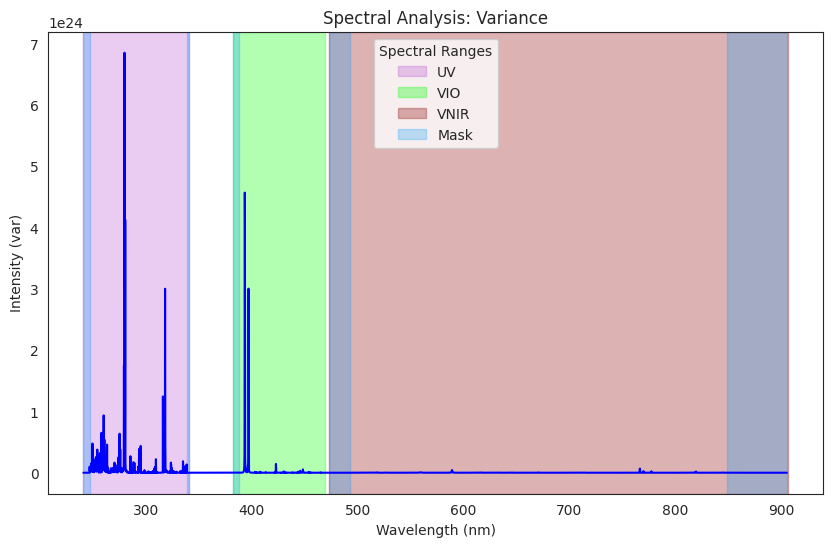

In [33]:
plt.figure(figsize=(10, 6))

wave = var.index.astype(float)  # Convert index to float
intensity = var.values

sns.set_style("white")
sns.lineplot(x=wave, y=intensity, color="blue")

plt.title("Spectral Analysis: Variance")
plt.xlabel("Wavelength (nm)")
plt.ylabel("Intensity (var)")


# Colors for the spectral ranges
spectral_colors = {
    "UV": "#BA55D3",  # Medium Orchid
    "VIO": "#00FF00",  # Bright Green
    "VNIR": "#8B0000",  # Deep Red
}

# Overlaying spectral ranges
for range_name, (start, end) in spectral_ranges.items():
    plt.axvspan(start, end, alpha=0.3, color=spectral_colors[range_name], label=range_name)


for i, (start, end) in enumerate(masks):
    plt.axvspan(start, end, alpha=0.25, color="#0099ff", label="Mask" if i == 0 else None)

plt.legend(title="Spectral Ranges")

plt.show()